In [30]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [3]:
# Read in the cleaned training data

file_path = '../data/train_clean.csv'
train_clean = pd.read_csv(file_path)

In [4]:
# Show more rows and columns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

In [5]:
# Initial showing of columns

train_clean.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [6]:
train_clean.shape

(2051, 78)

In [100]:
# Create features matrix (X) and target vector (y) from numeric data

X = train_clean._get_numeric_data()[['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                                     'Garage Cars', 'Total Bsmt SF', '1st Flr SF']]
y = train_clean['SalePrice']

## 1) Develop Initial Model

In [101]:
# Fit initial model

model = LinearRegression()
model.fit(X, y)

# Find R-squared value

print(f'R-squared: {model.score(X, y)}')

# Cross validate

print(f'Cross Validation Score: {cross_val_score(model, X, y).mean()}')

# Find root mean squared error of initial model

y_true = y
y_pred = model.predict(X)

print(f'Root Mean Squared Error: {mean_squared_error(y_true, y_pred) ** (1/2)}')

R-squared: 0.7788329597709052
Cross Validation Score: 0.7708823249719498
Root Mean Squared Error: 37264.99140474722


C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## 2) Perform Train/Test Split and Cross-Validation 

In [102]:
# Perform a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model based on training data

model_split = LinearRegression()
model_split.fit(X_train, y_train)

# Find R-squared value

print(f'R-squared (Training): {model_split.score(X_train, y_train)}')
print(f'R-squared (Testing): {model_split.score(X_test, y_test)}')

# Cross validate

print(f'Cross Validation Score: {cross_val_score(model_split, X_train, y_train).mean()}')

# Find root mean squared error of initial model

y_true_split = y_test
y_pred_split = model.predict(X_test)

print(f'Root Mean Squared Error: {mean_squared_error(y_true_split, y_pred_split) ** (1/2)}')

R-squared (Training): 0.762996595774433
R-squared (Testing): 0.824921675323487
Cross Validation Score: 0.7374599060146414
Root Mean Squared Error: 32325.86989610493


C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## 3) Run Project Testing Data Through Model to Generate Submission Targets

In [104]:
# Read in the cleaned testing data

file_path = '../data/test_clean.csv'
test_clean = pd.read_csv(file_path)

# Select relevant columns to use as predictors

X_target = test_clean[['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                                     'Garage Cars', 'Total Bsmt SF', '1st Flr SF']]

# Generate predictions based on the project testing data

y_pred = model.predict(X_target)

# Make sure output predictions are realistic

print(pd.DataFrame(y_pred).head())
print()

# Find average price of home in Ames

print(f'Average Price of Home in Ames, IA: ${y_pred.mean()}')

# Append targets to original DataFrame

y_target = pd.DataFrame(y_pred)
submission = test_clean.join(y_target)
submission.drop('Unnamed: 0', axis=1, inplace=True)
submission.rename({0: 'SalePrice'}, axis=1, inplace=True)

submission[['Id', 'SalePrice']].to_csv('../data/Submissions/submission_v2.csv', index=False)

               0
0  182665.356834
1  210403.302885
2  187477.801132
3  129834.304468
4  188638.924950

Average Price of Home in Ames, IA: $179008.78951463194


## Might be Redundant Code

In [30]:
# Scale data

ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Evaluate with cross_val_score

cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.7369251404436146

In [33]:
# The average price based on the training data

y_train.mean()

181061.9934980494

In [34]:
# Find R-squared for scaled training data

lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train)

0.7454848933007823

In [37]:
# Find R-squared for testing data

lr.score(X_test_sc, y_test)

0.7931501013915809

A high bias model would have a low R-squared value; a high variance model would have a high R-squared value.

In [73]:
# Find predictions based on the test portion of the training data

preds = lr.predict(X_test_sc)
residuals = y_test - preds

# Find submission predictions based on the test data

S_test = pd.read_csv('../data/test_clean.csv')
S_test = S_test._get_numeric_data()

ss_submission = StandardScaler()
ss_submission.fit(S_test)

S_test_sc = ss_submission.transform(S_test)

preds_test = lr.predict(S_test_sc)

ValueError: shapes (879,39) and (3,) not aligned: 39 (dim 1) != 3 (dim 0)

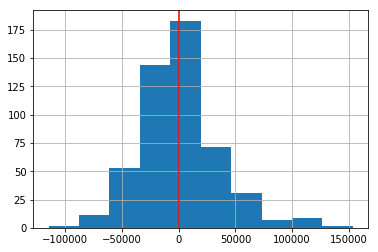

In [41]:
# Visualize dsitribution of residuals

residuals.hist();
plt.axvline(0, color='red');

# Conclusion: The residuals seem to be normally distributed with a mean of zero and can therefore be considered homoskedastic

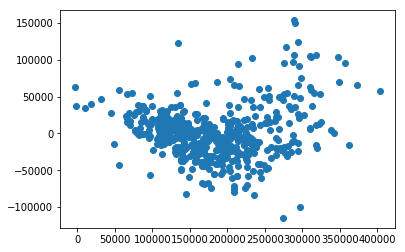

In [62]:
plt.scatter(preds, residuals); # Homoskedastic, the residuals are clustered around a mean of zero

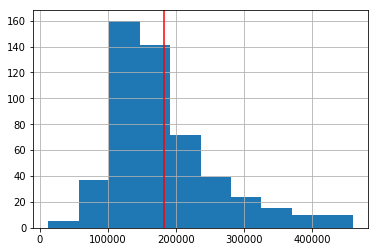

In [21]:
y_test.hist();
plt.axvline(y_test.mean(), color='red');

In [44]:
r2_score(y_test, preds)

0.7931501013915809

Text(0.5, 1.0, 'Predicted Price vs. Observed Price of a House in Ames')

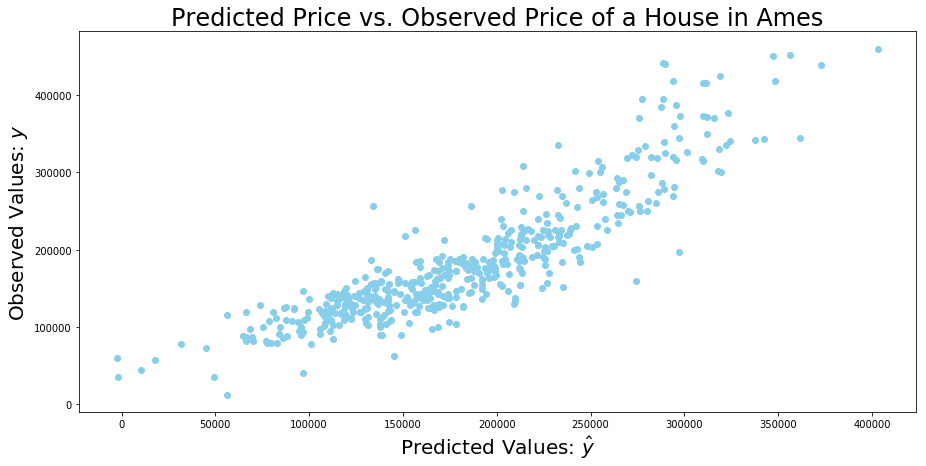

In [63]:
# Create a plot showing predictions vs. real world data

plt.figure(figsize=(15, 7))
plt.scatter(preds, y_test, color='skyblue', alpha=1);
plt.xlabel("Predicted Values: $\hat{y}$", fontsize=20)
plt.ylabel("Observed Values: $y$", fontsize=20)
plt.title('Predicted Price vs. Observed Price of a House in Ames', fontsize=24)

Based on the linearity of the data visualized above, we can say that a price of a house in Ames can be somewhat reasonably predicted by three variables: 

    1) Overall Qual: Rates the overall material and finish of the house
    2) Gr Liv Area: Above grade (ground) living area square feet
    3) Garage Area: Size of garage in square feet